# Quanvolutional Neural Networks

***Submitted by Disha Mondal***

This tutorial, inspired by the Pennylane tutorial(cited below) demonstrates how to implement the *Quanvolutional Neural Network*, a quantum machine learning model originally introduced by Henderson et al. (2019).

CITATION :
@misc{AndreaMari2020,
      title = "Quanvolutional Neural Networks",
      author = "Andrea Mari",
      year = "2020",
      month = "03",
      journal = "PennyLane Demos",
      publisher = "Xanadu",
      howpublished = "\url{https://pennylane.ai/qml/demos/tutorial_quanvolution/}",
      note = "Date Accessed: 2024-07-17"
    }

The above mentioned tutorial is followed and implemented and each step is explained in own words.

Overview:

### Classical Convolution

A convolutional neural network (CNN) is a type of neural network particularly effective for image processing tasks. The core component of a CNN is the convolution layer, which processes input data by applying a local convolution instead of a global function.

In the context of images, the convolution layer operates by processing small local regions of the image with the same kernel (a small filter). Each of these regions is processed to produce an output that typically corresponds to different channels of a single pixel in the output image. By combining the outputs from all these small regions, a new image-like structure is formed. This output can then be fed into additional layers for further processing.

### Quantum Convolution

The concept of convolution can be extended to quantum computing through quantum variational circuits. This method involves a process similar to classical convolution, but adapted for quantum systems:

1. Select a small region of the input image, such as a $2 \times 2$ pixel square.
2. Encode this selected region into a quantum state using a specific encoding method.
3. Apply a variational quantum circuit to the encoded state.
4. Perform measurements on the quantum state, and then process these measurements classically to produce the output pixel values.

This procedure is repeated for all regions of the input image, resulting in an output that can be further processed by additional layers in the neural network.

## Imports and Setup

Requirements:

-Pennylane library

-Numpy version of Pennylane library

-Tensorflow Module

-Plotting library matplotlib


In [2]:
pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     -------------------------------------- 48.7/48.7 kB 620.1 kB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ----------------------------------

In [1]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

### Setting of the main hyper-parameters of the model

#### Hyper-Parameters:

1. **n_epochs = 30**: This parameter defines the number of optimization epochs. An epoch represents one complete pass through the entire training dataset. Training for multiple epochs allows the model to iteratively update its weights to minimize the loss function. The choice of 30 epochs indicates that the model will go through the training data 30 times, potentially improving its performance with each pass.

2. **n_layers = 1**: This parameter specifies the number of random layers in the quantum variational circuit. The depth of the circuit can affect the model's ability to learn complex patterns. Here, having one layer means the model is relatively shallow, which might be suitable for simpler tasks or to reduce computational complexity.

3. **n_train = 50**: This is the size of the training dataset, indicating that 50 samples will be used to train the model. A larger training set generally provides more information for the model to learn from, leading to better performance. However, a smaller set can be used for faster experimentation or when data is limited.

4. **n_test = 30**: This defines the size of the test dataset, meaning 30 samples will be used to evaluate the model's performance. Testing on unseen data is crucial for assessing how well the model generalizes to new, unseen examples.

#### Setup Steps:

1. **Stration_assets/quanvolution/"**: This variable sets the path where data (such as preprocessed data, model checkpoints, or results) will be saved. Using a specific path helps in organizing and retrieving files easily during experimentation or deployment.

2. **PREPROCESS = True**: This flag indicates whether to perform quantum processing on the input data. If set to `False`, the model will skip the quantum processing step and load preprocessed data from the specified SAVE_PATH. This can save time during experimentation by avoiding redundant processing.

3. **np.random.seed(0)**: Setting a seed for NumPy's random number generator ensures reproducibility in the randomness of operations (such as data shuffling or initialization of random weights). The seed value `0` is chosen to make the results consistent across different runs.

4. **tf.random.set_seed(0)**: Similar to the NumPy seed, this sets a seed for TensorFlow's random number generator. Consistent seeding ensures that the random operations within TensorFlow (like initial weight settings in neural networks) produce the same results across runs, which is essential for reproducibility and debugging.

#### Importance of Each Step:

- **Number of Optimization Epochs (n_epochs)**: Multiple epochs help the model learn and refine its parameters iteratively. Too few epochs might lead to underfitting, while too many could cause overfitting, where the model learns noise in the training data instead of the actual pattern.
  
- **Number of Random Layers (n_layers)**: The depth of the quantum circuit affects its capacity to model complex data. A deeper circuit can capture more intricate relationships but at the cost of higher computational resources and risk of overfitting.

- **Size of Train and Test Datasets (n_train and n_test)**: Sufficient training data is essential for learning accurate patterns. A representative test set is crucial for evaluating generalization. Balancing between the size of these sets and computational feasibility is key.

- **Data Saving Path (SAVE_PATH)**: Organized data management is critical for large-scale experiments. The ability to save and retrieve data efficiently aids in workflow continuity and debugging.

- **Preprocessing Flag (PREPROCESS)**: This controls whether to preprocess the data on-the-fly or use preprocessed data. It allows flexibility in experimentation, particularly useful when quantum processing is time-consuming.

- **Seeding Random Number Generators (np.random.seed and tf.random.set_seed)**: Ensuring reproducibility is fundamental in scientific research and model development. It enables others to validate results and facilitates consistent experimentation.

By carefully setting and understanding these hyper-parameters and setup steps, one can effectively train and evaluate machine learning models, ensuring reproducible and reliable results.

In [2]:
n_epochs = 30   # Number of optimization epochs
n_layers = 1    # Number of random layers
n_train = 50    # Size of the train dataset
n_test = 30     # Size of the test dataset

SAVE_PATH = "../quanvolution/"  # Data saving folder
PREPROCESS = True           # If False, skip quantum processing and load data from SAVE_PATH
np.random.seed(0)           # Seed for NumPy random number generator
tf.random.set_seed(0)       # Seed for TensorFlow random number generator


## Loading and Preparing Data

#### Importing the MNIST Dataset:

We start by loading the MNIST dataset, which contains 60,000 training images and 10,000 test images of handwritten digits. Each image is a 28x28 pixel grayscale image. This dataset is commonly used for training and evaluating image processing and machine learning models.

#### Reducing the Dataset Size:

The training and test datasets are reduced to n_train (50) and n_test (30) images respectively. This step speeds up the evaluation of the demo.

#### Normalizing Pixel Values:

Pixel values in the MNIST dataset range from 0 to 255. Normalizing these values to a range of 0 to 1 (by dividing by 255) is a common preprocessing step that helps to stabilize and speed up the training of neural networks. Normalization ensures that the input features have a consistent scale, which can improve the convergence of gradient-based optimization algorithms.

#### Adding Extra Dimension for Convolution Channels:

Convolutional neural networks (CNNs) expect input data with a specific shape, often including a channel dimension. MNIST images are grayscale, so they originally have a shape of (28, 28). Adding an extra dimension transforms the shape to (28, 28, 1), where 1 is the channel dimension. This is necessary for compatibility with convolution layers, which typically operate on multi-channel input (e.g., RGB images have 3 channels).

#### Importance of each step:

**Loading the Dataset**: Provides the necessary data for training and evaluating the model.

**Reducing Dataset Size**: Allows for quicker testing and iteration, making the demo more manageable and efficient.

**Normalizing Pixel Values**: Enhances training stability and performance by ensuring the input features have a consistent scale.

**Adding Extra Dimension**: Prepares the data in the required format for convolutional neural networks, enabling proper functioning of convolution operations.

In [3]:
mnist_dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

# Reduce dataset size
train_images = train_images[:n_train]
train_labels = train_labels[:n_train]
test_images = test_images[:n_test]
test_labels = test_labels[:n_test]

# Normalize pixel values within 0 and 1
train_images = train_images / 255
test_images = test_images / 255

# Add extra dimension for convolution channels
train_images = np.array(train_images[..., tf.newaxis], requires_grad=False)
test_images = np.array(test_images[..., tf.newaxis], requires_grad=False)


## Quanvolutional Layer Implementation- Quantum Circuit as a Convolution Kernel

#### Initializing the Quantum Device:

A quantum device is initialized using PennyLane's default.qubit simulator, which mimics the behavior of a quantum system with 4 qubits. This device will be used to run quantum circuits.

#### Generating Random Circuit Parameters

Random parameters for the quantum circuit are generated. These parameters are uniformly sampled between 0 and 2π and are used to initialize the random layers in the circuit. The shape (n_layers, 4) indicates that there are 'n_layers' layers, each controlling 4 qubits.

#### Defining the Quantum Node (QNode)

QNode Definition: The circuit function is decorated with @qml.qnode(dev), converting it into a QNode that runs on the specified quantum device.

Input Encoding: Four classical input values (phi) are encoded into the quantum state using local Ry rotations. Each rotation's angle is scaled by 𝜋.

Random Quantum Circuit: The encoded quantum state is processed by random layers defined by RandomLayers, which uses the rand_params generated earlier.

Measurement: The circuit concludes with a measurement in the computational basis, returning the expectation values of the Pauli-Z operator for each of the 4 qubits. These expectation values are the classical outputs of the circuit.

#### Quantum Convolution Function

Output Initialization: A new array out of shape (14, 14, 4) is initialized. This will store the output of the quantum convolution, where each pixel has 4 channels.

Loop Over Image Regions: The function iterates over the input image in steps of 2, selecting 2x2 pixel squares. This is done to match the quantum circuit's input requirements of 4 values.

Processing with Quantum Circuit: For each 2x2 pixel square, the pixel values are extracted and passed to the quantum circuit. The resulting 4 expectation values are stored in the corresponding location in the output array.

Mapping Results: The expectation values from the quantum circuit are mapped to 4 different channels of the output pixel. The indices j//2 and k//2 ensure that the output image has half the resolution of the input image.

In [4]:
#Initializing the Quantum Device
dev = qml.device("default.qubit", wires=4)
# Random circuit parameters
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, 4))

@qml.qnode(dev)
def circuit(phi):
    # Encoding of 4 classical input values
    for j in range(4):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(4)))

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(4)]

#Quantum Convolution Function

def quanv(image):
    """Convolves the input image with many applications of the same quantum circuit."""
    out = np.zeros((14, 14, 4))

    # Loop over the coordinates of the top-left pixel of 2X2 squares
    for j in range(0, 28, 2):
        for k in range(0, 28, 2):
            # Process a squared 2x2 region of the image with a quantum circuit
            q_results = circuit(
                [
                    image[j, k, 0],
                    image[j, k + 1, 0],
                    image[j + 1, k, 0],
                    image[j + 1, k + 1, 0]
                ]
            )
            # Assign expectation values to different channels of the output pixel (j/2, k/2)
            for c in range(4):
                out[j // 2, k // 2, c] = q_results[c]
    return out

## Quantum Pre-Processing of the Dataset

**Overview**:

Quantum pre-processing involves applying a quantum convolution layer to the dataset before training a classical model. This step transforms the input data using quantum operations, potentially extracting features that are not easily accessible through classical means. This pre-processing is done once and the results are saved, avoiding the need for repeated quantum computations during model training and evaluation.

#### Checking the Pre-Processing Flag:

This flag determines whether the quantum pre-processing should be performed. If set to True, the dataset undergoes quantum convolution and the results are saved. If False, pre-processed data is loaded directly from disk.

#### Quantum Pre-Processing of Training and Testing Images:

**Initialization**: An empty list (q_train_images / q_test_images) is initialized to store the quantum-processed training images.

**Progress Indicator**: A progress indicator is printed to show the pre-processing progress.

**Loop**: Each training image is processed by the quanv function, which applies the quantum convolution. The result is appended to the list.

**Conversion to Array**: After processing all images, the list is converted to a NumPy array for efficient storage and manipulation.

#### Saving the Pre-Processed Images:

The pre-processed training and test images are saved as .npy files in the specified SAVE_PATH. This allows the pre-processed data to be loaded directly in future runs, avoiding the need to re-run the quantum convolution.

#### Loading Pre-Processed Images:

If PREPROCESS is False, the pre-processed images are loaded from the saved files. This step is faster and avoids unnecessary quantum computations, making the workflow more efficient.

#### Visualization of Quantum Convolution Effect:

**Figure Setup:** A figure with subplots is created to visualize the effect of quantum convolution on a batch of samples.

**Plot Input Images:** The first row of subplots displays the original input images.

**Plot Output Channels:** Subsequent rows display the 4 output channels produced by the quantum convolution for each sample.

**Layout and Display:** The layout is adjusted to avoid overlapping, and the figure is displayed using plt.show().


In [5]:
if PREPROCESS == True:
    q_train_images = []
    print("Quantum pre-processing of train images:")
    for idx, img in enumerate(train_images):
        print("{}/{}        ".format(idx + 1, n_train), end="\r")
        q_train_images.append(quanv(img))
    q_train_images = np.asarray(q_train_images)

    q_test_images = []
    print("\nQuantum pre-processing of test images:")
    for idx, img in enumerate(test_images):
        print("{}/{}        ".format(idx + 1, n_test), end="\r")
        q_test_images.append(quanv(img))
    q_test_images = np.asarray(q_test_images)

    # Save pre-processed images
    np.save(SAVE_PATH + "q_train_images.npy", q_train_images)
    np.save(SAVE_PATH + "q_test_images.npy", q_test_images)

Quantum pre-processing of train images:
50/50        
Quantum pre-processing of test images:


In [6]:
# Load pre-processed images
q_train_images = np.load(SAVE_PATH + "q_train_images.npy")
q_test_images = np.load(SAVE_PATH + "q_test_images.npy")

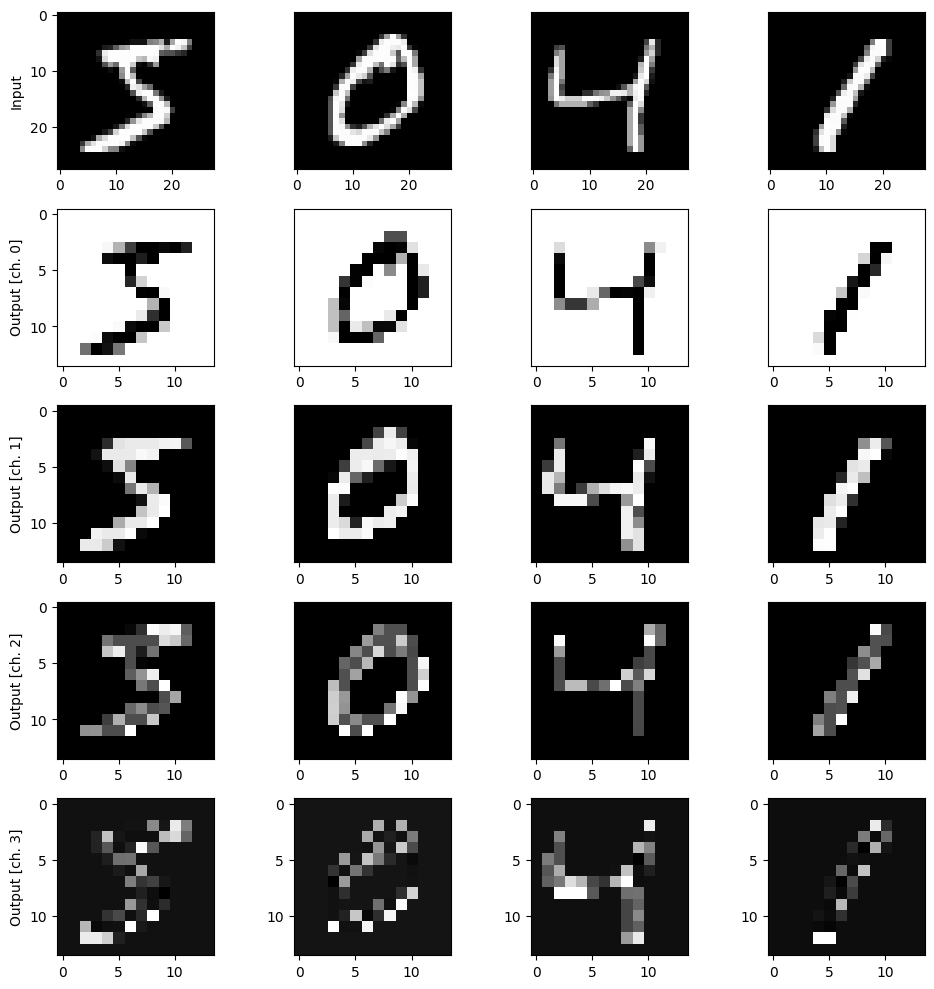

In [7]:
#Visualisation

n_samples = 4
n_channels = 4
fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(train_images[k, :, :, 0], cmap="gray")

    # Plot all output channels
    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(q_train_images[k, :, :, c], cmap="gray")

plt.tight_layout()
plt.show()

## Hybrid Quantum-Classical Model

**Overview:**

The hybrid quantum-classical model combines quantum pre-processing with a classical neural network for classification. This approach leverages quantum computing for feature extraction and classical neural networks for classification, aiming to enhance performance by utilizing quantum features.

#### Defining the Classical Model:

**Model Definition**: 

The function MyModel defines a simple neural network using the Keras Sequential API. 

The model consists of:

1. Flatten Layer: Converts the input from a multi-dimensional array (like images) into a 1D array.
2. Dense Layer: A fully connected layer with 10 output nodes, each representing one of the 10 digit classes. The softmax activation function is used to output probabilities for each class.

**Model Compilation**:

The model is compiled with:

1. Optimizer: 'adam' optimizer, an efficient variant of gradient descent.
2. Loss Function: 'sparse_categorical_crossentropy', suitable for multi-class classification.
3. Metrics: 'accuracy' to evaluate the model performance.


In [8]:
def MyModel():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

## Training the Hybrid Model:

#### Model Initialization: 

An instance of the model q_model is created using the MyModel function.

#### Model Training: 

The model is trained on the quantum pre-processed training images (q_train_images) with corresponding labels (train_labels). The validation is performed on the quantum pre-processed test images (q_test_images) and their labels (test_labels). 

Training parameters include:
1. Batch Size: 4, meaning the model updates weights after processing every 4 samples.
2. Epochs: 30, the number of times the model will iterate over the entire training dataset.
3. Verbose: 2, providing detailed logging of the training process.

Training Output:

The training output logs the loss and accuracy for each epoch, both for training and validation datasets. This helps track the model's performance and convergence over time.


In [9]:
q_model = MyModel()

q_history = q_model.fit(
    q_train_images,
    train_labels,
    validation_data=(q_test_images, test_labels),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/30
13/13 - 1s - 92ms/step - accuracy: 0.0800 - loss: 2.7886 - val_accuracy: 0.1000 - val_loss: 2.4517
Epoch 2/30
13/13 - 0s - 7ms/step - accuracy: 0.3200 - loss: 1.9989 - val_accuracy: 0.2000 - val_loss: 2.2215
Epoch 3/30
13/13 - 0s - 7ms/step - accuracy: 0.5200 - loss: 1.6630 - val_accuracy: 0.3667 - val_loss: 1.9839
Epoch 4/30
13/13 - 0s - 7ms/step - accuracy: 0.7400 - loss: 1.3512 - val_accuracy: 0.4667 - val_loss: 1.8512
Epoch 5/30
13/13 - 0s - 7ms/step - accuracy: 0.8600 - loss: 1.1144 - val_accuracy: 0.4333 - val_loss: 1.7328
Epoch 6/30
13/13 - 0s - 7ms/step - accuracy: 0.9400 - loss: 0.9286 - val_accuracy: 0.5000 - val_loss: 1.6284
Epoch 7/30
13/13 - 0s - 7ms/step - accuracy: 0.9800 - loss: 0.7791 - val_accuracy: 0.5000 - val_loss: 1.5440
Epoch 8/30
13/13 - 0s - 7ms/step - accuracy: 0.9800 - loss: 0.6610 - val_accuracy: 0.5667 - val_loss: 1.4723
Epoch 9/30
13/13 - 0s - 7ms/step - accuracy: 0.9800 - loss: 0.5649 - val_accuracy: 0.6000 - val_loss: 1.4118
Epoch 10/30
13/13 

## Comparison with Classical Model:

Baseline Performance: Training a classical model on raw data provides a baseline for evaluating the benefits of quantum pre-processing.
Direct Comparison: Allows for a clear assessment of the quantum layer's contribution to the overall performance improvement.

In [10]:
c_model = MyModel()

c_history = c_model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/30
13/13 - 1s - 72ms/step - accuracy: 0.1200 - loss: 2.2565 - val_accuracy: 0.1333 - val_loss: 2.1692
Epoch 2/30
13/13 - 0s - 9ms/step - accuracy: 0.4200 - loss: 1.8731 - val_accuracy: 0.3000 - val_loss: 2.0105
Epoch 3/30
13/13 - 0s - 7ms/step - accuracy: 0.6200 - loss: 1.6050 - val_accuracy: 0.4000 - val_loss: 1.8703
Epoch 4/30
13/13 - 0s - 7ms/step - accuracy: 0.7000 - loss: 1.3815 - val_accuracy: 0.4333 - val_loss: 1.7477
Epoch 5/30
13/13 - 0s - 7ms/step - accuracy: 0.8200 - loss: 1.1935 - val_accuracy: 0.5333 - val_loss: 1.6437
Epoch 6/30
13/13 - 0s - 7ms/step - accuracy: 0.8400 - loss: 1.0358 - val_accuracy: 0.5667 - val_loss: 1.5570
Epoch 7/30
13/13 - 0s - 7ms/step - accuracy: 0.8800 - loss: 0.9040 - val_accuracy: 0.5667 - val_loss: 1.4852
Epoch 8/30
13/13 - 0s - 9ms/step - accuracy: 0.9400 - loss: 0.7936 - val_accuracy: 0.6667 - val_loss: 1.4253
Epoch 9/30
13/13 - 0s - 7ms/step - accuracy: 0.9800 - loss: 0.7009 - val_accuracy: 0.6667 - val_loss: 1.3750
Epoch 10/30
13/13 

## Result

We can finally plot the test accuracy and the test loss with respect to the number of training epochs.

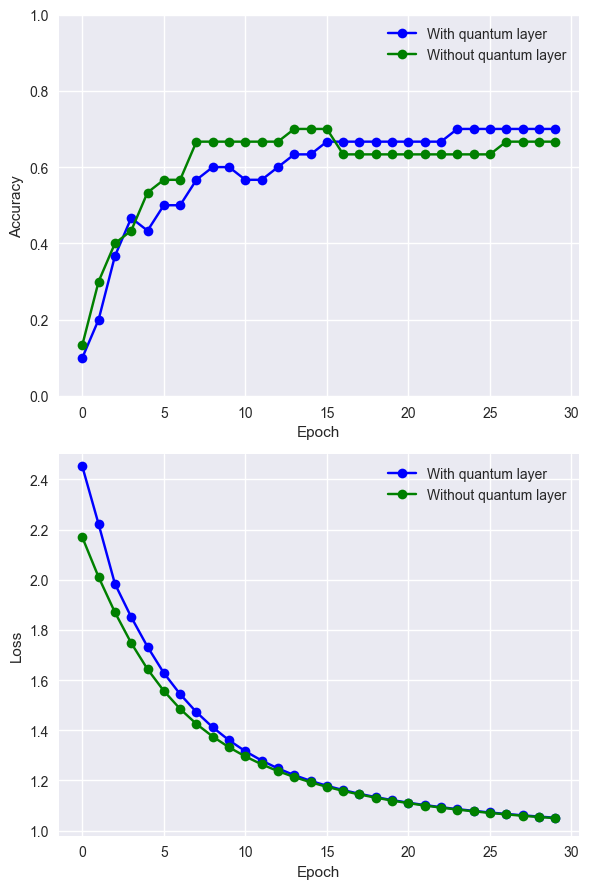

In [14]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(q_history.history["val_accuracy"], "-ob", label="With quantum layer")
ax1.plot(c_history.history["val_accuracy"], "-og", label="Without quantum layer")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(q_history.history["val_loss"], "-ob", label="With quantum layer")
ax2.plot(c_history.history["val_loss"], "-og", label="Without quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()

plt.style.use("seaborn") gave error so had to replace it with seaborn-v0_8 after finding information using following code

In [13]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
